## Iris flower dataset

The Iris flower dataset contains 150 observations of iris flowers, each with four attributes: sepal length, sepal width, petal length, and petal width. The goal is to use these attributes to classify the flowers into one of three species: Iris setosa, Iris virginica, and Iris versicolor. The iris flower dataset is considered a simple and well-understood dataset.

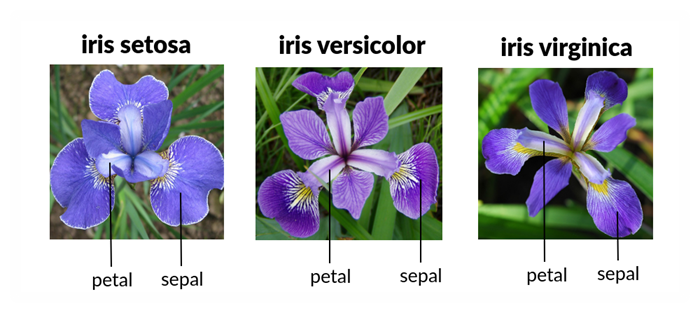

## Overall procedure for KNN

# KNN implementation for classification

### Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [34]:
#df_clss = pd.read_excel('Iris.xlsx')
df_clss = pd.read_excel('Training_dataset_iris.xlsx')
df_clss

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
139,145,6.7,3.3,5.7,2.5,Iris-virginica
140,146,6.7,3.0,5.2,2.3,Iris-virginica
141,147,6.3,2.5,5.0,1.9,Iris-virginica
142,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory data analysis

Count Values

In [35]:
df_clss['Species'].value_counts()

Iris-setosa        48
Iris-versicolor    48
Iris-virginica     48
Name: Species, dtype: int64

Check missing data

In [36]:
# Check missing data
df_clss.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Check numerical

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

New label

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE = LabelEncoder()
df_clss['Species']=LE.fit_transform(df_clss['Species'])

<AxesSubplot:>

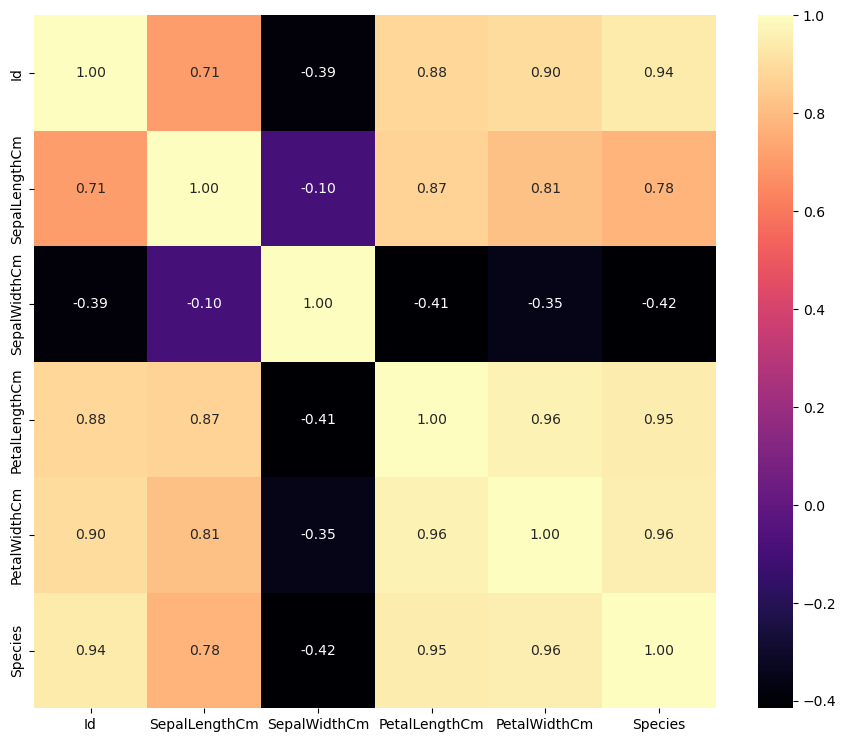

In [7]:
# Correlation heatmap
plt.figure(figsize=(11,9))
sns.heatmap(df_clss.corr(),annot=True,cmap="magma",fmt='.2f')

## Training

In [8]:
X = df_clss.iloc[:,3:5]
y = df_clss.iloc[:,-1]

In [9]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

## Find the best K value (GridSearchCV)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=1, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1,20)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 3}

In [11]:
knn_final = KNeighborsClassifier(n_neighbors = 3)
knn_final.fit(X_train, y_train)
knn_final.score(X_test,y_test)

0.9655172413793104

## Find the best K value (plot the accuracy)

In [12]:
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i)
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test,y_test))
  count.append(i)

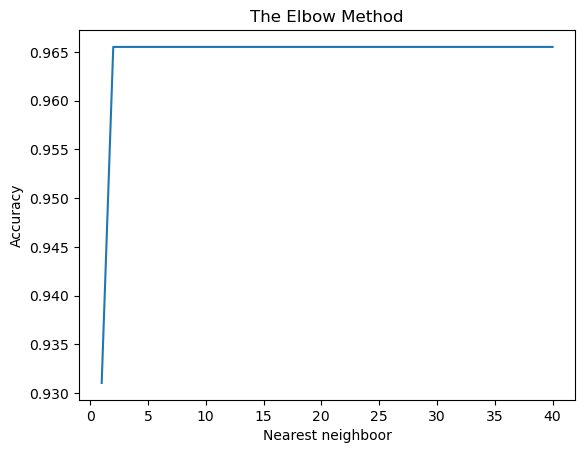

In [13]:
plt.title('The Elbow Method')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

## New data

In [14]:
DT = pd.read_excel("new_iris_data.xlsx")
DT

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,5.0,3.4,1.5,0.2,Iris-setosa
1,27,5.0,3.4,1.6,0.4,Iris-setosa
2,62,5.9,3.0,4.2,1.5,Iris-versicolor
3,83,5.8,2.7,3.9,1.2,Iris-versicolor
4,105,6.5,3.0,5.8,2.2,Iris-virginica
5,148,6.5,3.0,5.2,2.0,Iris-virginica


In [15]:
X_new = DT.iloc[:, 3:5]
y_new = DT.iloc[:,-1]

In [16]:
y_new = LE.fit_transform(y_new)

In [17]:
knn_new = KNeighborsClassifier(n_neighbors = 3)
knn_new.fit(X_train, y_train)
y_pred = knn_new.predict(X_new)

In [18]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    diag.append('Iris-setosa')
  elif y_pred[i] == 1:
    diag.append('Iris-versicolor')
  else:
    diag.append('Iris-virginica')

diag = pd.DataFrame(diag, columns = ['Predicted species'])

In [19]:
compare = pd.merge(diag, DT['Species'], left_index=True, right_index=True)
compare

,Predicted species,Species
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica


# K-means implementation for clustering

In [20]:
df_clst = pd.read_excel('Training_dataset_iris.xlsx')
df_clst

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
139,145,6.7,3.3,5.7,2.5,Iris-virginica
140,146,6.7,3.0,5.2,2.3,Iris-virginica
141,147,6.3,2.5,5.0,1.9,Iris-virginica
142,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
df_clst.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
X = df_clst.iloc[:,1:5]
y = df_clst.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
139    Iris-virginica
140    Iris-virginica
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
Name: Species, Length: 144, dtype: object

<AxesSubplot:>

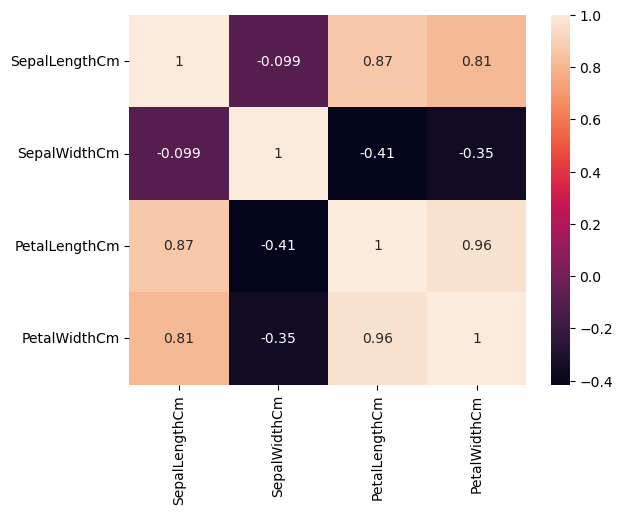

In [23]:
sns.heatmap(X.corr(),annot=True )

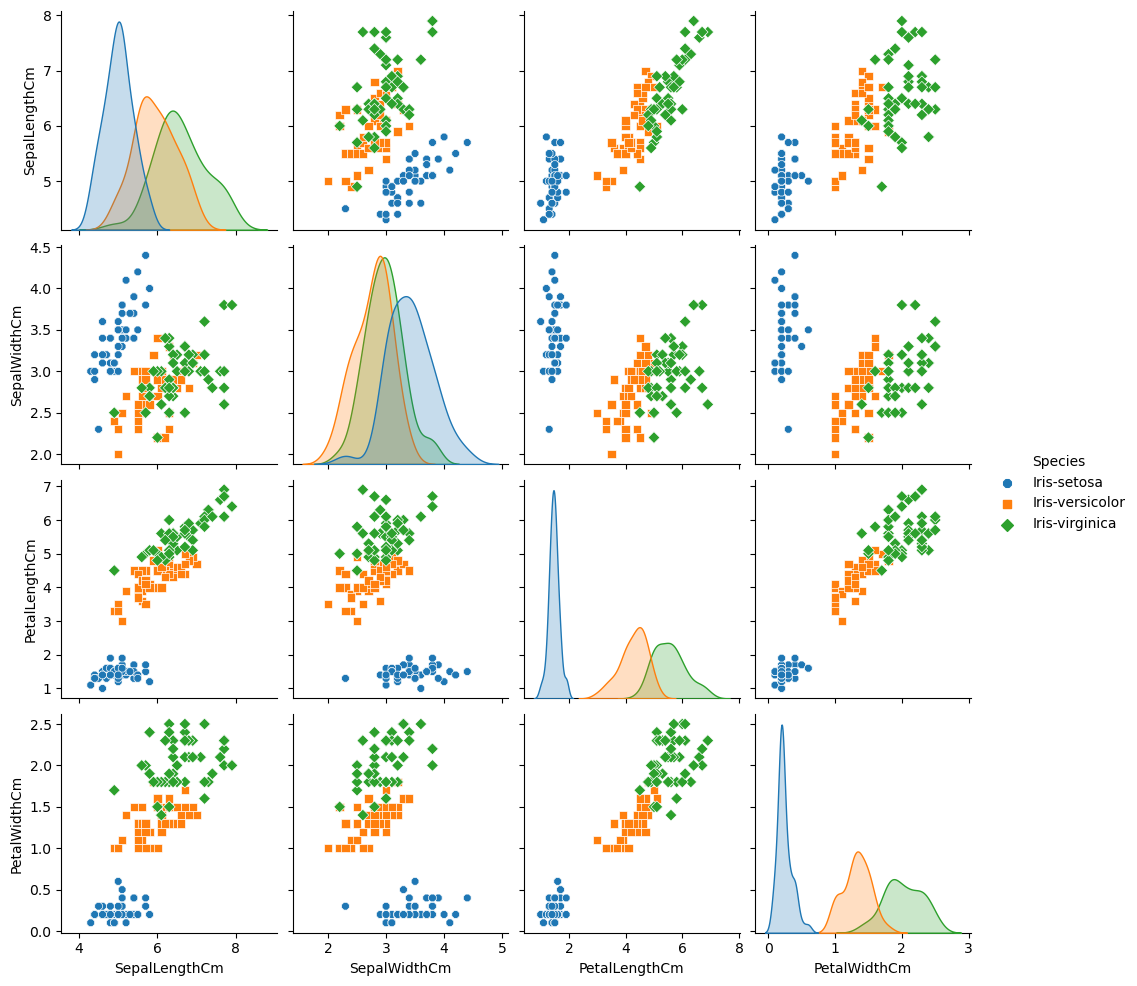

In [24]:
sns.pairplot(df_clst.drop(['Id'], axis = 1), hue='Species', markers = ["8","s","D"])

In [25]:
from sklearn.cluster import KMeans
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(X)
  sse.append(km.inertia_)

c:\Users\Tonkhaow\anaconda3\envs\cognitivePro\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


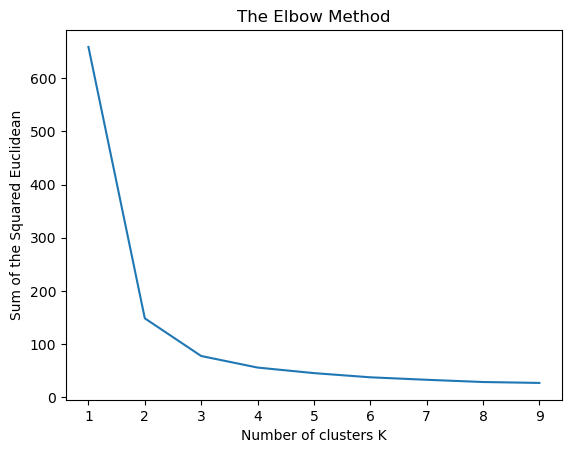

In [26]:
plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [27]:
km1 = KMeans(n_clusters=3)
km1.fit(X)
y_cluster = km1.predict(X)
y_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2])

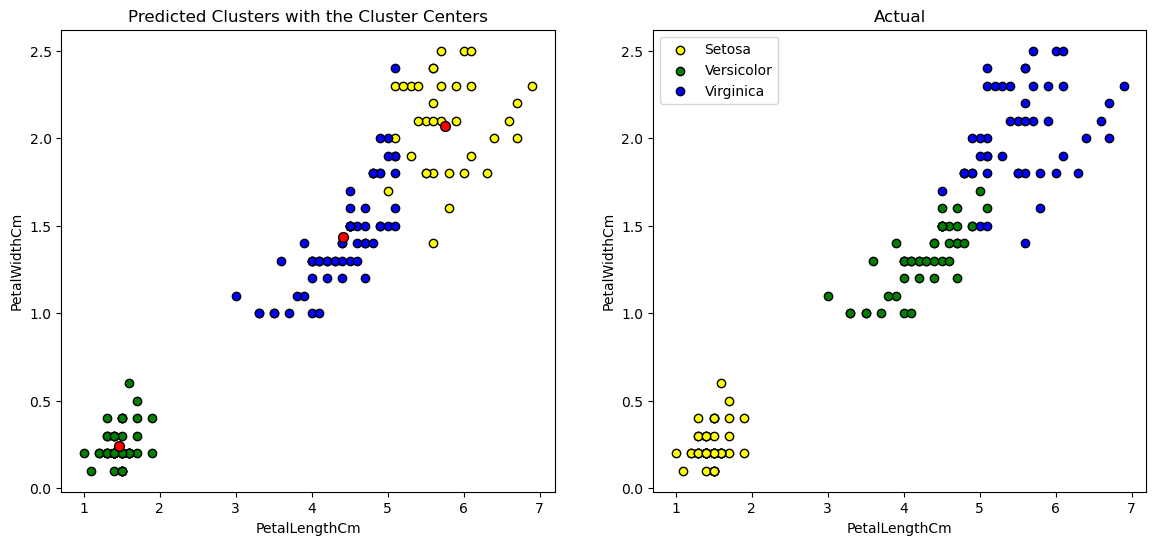

In [28]:
fig = plt.figure(figsize=(14, 6))
# predicted
ax1 = fig.add_subplot(121)
colours = ['yellow','green','blue']
for idx in range(3):
    plt.scatter(df_clst[y_cluster == idx]['PetalLengthCm'], df_clst[y_cluster == idx]['PetalWidthCm'], c = colours[idx], edgecolor='k')
plt.scatter(km1.cluster_centers_[:,2], km1.cluster_centers_[:,3], s = 50, c = 'red', label = 'Centroids', edgecolor='k')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Predicted Clusters with the Cluster Centers')

# actual
ax2 = fig.add_subplot(122)
plt.scatter(df_clst[y == 'Iris-setosa']['PetalLengthCm'], df_clst[y == 'Iris-setosa']['PetalWidthCm'], c='yellow', label='Setosa', edgecolor='k')
plt.scatter(df_clst[y == 'Iris-versicolor']['PetalLengthCm'], df_clst[y == 'Iris-versicolor']['PetalWidthCm'], c='g', label='Versicolor', edgecolor='k')
plt.scatter(df_clst[y == 'Iris-virginica']['PetalLengthCm'], df_clst[y == 'Iris-virginica']['PetalWidthCm'], c='blue', label='Virginica', edgecolor='k')
plt.legend()
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Actual')
plt.show()

## New data

In [29]:
DT = pd.read_excel("new_iris_data.xlsx")
DT

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,8,5.0,3.4,1.5,0.2,Iris-setosa
1,27,5.0,3.4,1.6,0.4,Iris-setosa
2,62,5.9,3.0,4.2,1.5,Iris-versicolor
3,83,5.8,2.7,3.9,1.2,Iris-versicolor
4,105,6.5,3.0,5.8,2.2,Iris-virginica
5,148,6.5,3.0,5.2,2.0,Iris-virginica


In [30]:
X_new = DT.iloc[:,1:5]

In [31]:
pred = km1.predict(X_new)
pred

array([1, 1, 2, 2, 0, 0])